# An Analysis of Red and White Wine Samples to Determine the Relationship Between Wine Attributes and Quality Ratings

## 1.0 Overview

This project explores red and white wine samples to investigate how specific attributes influence wine quality ratings. By examining key characteristics—such as alcohol content, sugar levels, and acidity—this study aims to uncover patterns that may indicate which qualities are associated with higher-quality wines.

## 2.0 Data Set

### 2.1 Source
The dataset offers a comprehensive overview of both red and white varieties of Portuguese "Vinho Verde" wine, focusing specifically on their physicochemical and sensory attributes. The physicochemical attributes include factors such as acidity, pH levels, alcohol content, and various other chemical compositions that affect the wine's quality and characteristics. The sensory attributes encompass aspects like aroma, taste, mouthfeel, and overall quality, assessed through expert sensory evaluation.

Due to privacy and logistical constraints, the dataset does not include certain details such as grape varieties, brand names, or pricing information. This omission allows for stricter confidentiality while still enabling researchers and wine enthusiasts to conduct in-depth analyses of the wines' inherent qualities. By centering on these specific attributes, the dataset facilitates a more focused understanding of the "Vinho Verde" wines' profiles, contributing to better wine-making practices and consumer education.

Reference: [UCI Machine Learning Repository - Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

### 2.2 Attribute Information
The dataset includes the following attributes obtained from physicochemical tests:

**Input Variables**:
1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

**Output Variable**:
- **Quality**: A sensory-based score ranging from 0 to 10, representing the wine's quality.

## 3.0 Analytical Questions

In this study, we aim to explore the following key questions using the dataset:

1. Is one type of wine (red or white) generally associated with higher quality ratings?
2. Do wines with higher alcohol content tend to receive better quality scores?
3. Is there a correlation between sweetness, measured by residual sugar, and higher quality ratings?
4. What acidity levels are most commonly associated with the highest quality ratings?

This analysis will help identify patterns that contribute to a better understanding of the qualities of higher-rated wines.

## 4.0 Assessing Data

In [16]:
# 4.0 Assessing Data

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set pandas display option to show all columns in a single line
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

# Load the red and white wine datasets
red = pd.read_csv('data/wine+quality/winequality-red.csv', sep=';')
white = pd.read_csv('data/wine+quality/winequality-white.csv', sep=';')

# Display the number of samples (rows) and columns in each dataset
print("Red wine dataset shape:", red.shape)
print("White wine dataset shape:", white.shape)

# Show a preview of the first few rows of each dataset to understand the structure
print("\nRed wine dataset sample:")
print(red.head())

print("\nWhite wine dataset sample:")
print(white.head())

# Summary statistics for both datasets
print("\nRed wine dataset summary:")
print(red.describe())

print("\nWhite wine dataset summary:")
print(white.describe())


Red wine dataset shape: (1599, 12)
White wine dataset shape: (4898, 12)

Red wine dataset sample:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
1            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5
2            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5
3           11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6
4            7.4              0.70         0.00             1.9      0.076                 1

In [13]:
# features with missing values
red.info(), white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

(None, None)

In [14]:
# 1. Count duplicate rows in the white wine dataset
duplicate_rows_white = white.duplicated().sum()
print("Number of duplicate rows in the white wine dataset:", duplicate_rows_white)

# 2. Count the number of unique quality ratings in each dataset
unique_quality_red = red['quality'].nunique()
unique_quality_white = white['quality'].nunique()
print("Number of unique quality ratings in the red wine dataset:", unique_quality_red)
print("Number of unique quality ratings in the white wine dataset:", unique_quality_white)

# 3. Calculate the mean density of the red wine dataset
mean_density_red = red['density'].mean()
print("Mean density of the red wine dataset:", mean_density_red)


Number of duplicate rows in the white wine dataset: 937
Number of unique quality ratings in the red wine dataset: 6
Number of unique quality ratings in the white wine dataset: 7
Mean density of the red wine dataset: 0.9967466791744841


## 5.0 Appending Data
### 5.1 Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.” NumPy offers really easy way to do this. Here’s the documentation for NumPy’s repeat function.

In [17]:
# 5.0 Appending Data
# 5.1 Create Color Columns

# Create a color array for each dataframe using NumPy's repeat function
color_red = np.repeat('red', red.shape[0])
color_white = np.repeat('white', white.shape[0])

# Add the color array as a new column to each dataframe
red['color'] = color_red
white['color'] = color_white

# Display the first few rows of each dataframe to confirm the new column
print("Red wine dataset with 'color' column added:")
print(red.head())

print("\nWhite wine dataset with 'color' column added:")
print(white.head())


Red wine dataset with 'color' column added:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality color
0            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5   red
1            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5   red
2            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5   red
3           11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6   red
4            7.4              0.70         0.00             1.9      0.076                 11.0                  34.

### 5.2 Rename Columns
Use pandas' rename function to change the total_sulfur-dioxide column label to total_sulfur_dioxide. You can check out this Stack Overflow page to help you.

In [18]:
# Rename column in the red dataframe
red.rename(columns={'total_sulfur-dioxide': 'total_sulfur_dioxide'}, inplace=True)


### 5.3 Combine DataFrames with Append
Check the documentation for Pandas' append function and see if you can use this to figure out how to combine the dataframes.

In [20]:
# Append the red and white dataframes using pd.concat
wine_df = pd.concat([red, white], ignore_index=True)

# View the first few rows of the combined dataframe to check for success
wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## 6.0 Exploratory Data Analysis with Visualizations
Generate visualizations to explore and address the research questions.

### 6.1 Histograms of Selected Features
Question 1
Using histograms of various dataset columns, identify which of the following feature variables show right-skewed distributions:

Fixed Acidity
Total Sulfur Dioxide
pH
Alcohol

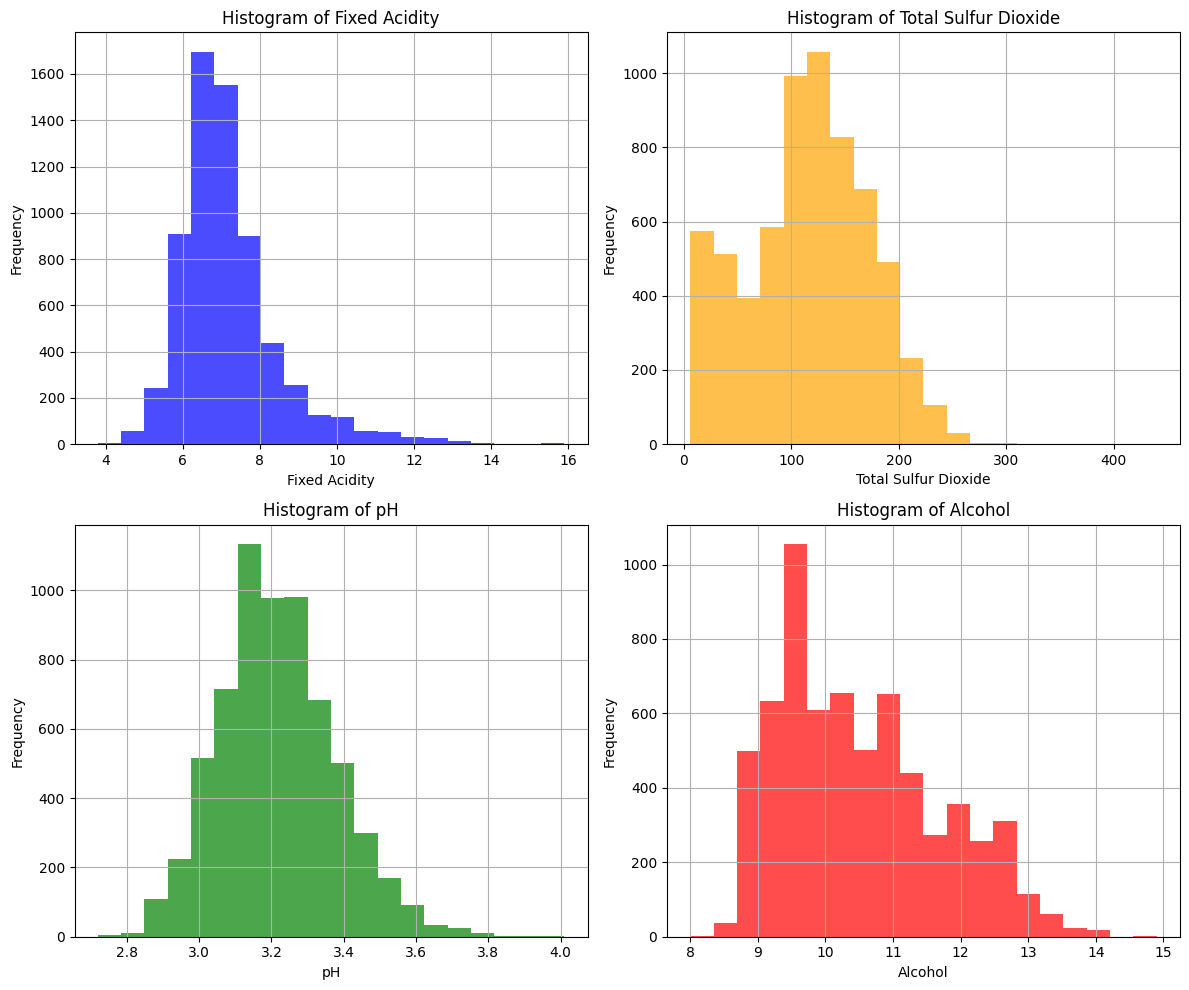

In [24]:
import matplotlib.pyplot as plt

# Strip whitespace from column names
wine_df.columns = wine_df.columns.str.strip()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Histogram for Fixed Acidity
plt.subplot(2, 2, 1)
wine_df['fixed acidity'].hist(bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')

# Histogram for Total Sulfur Dioxide
plt.subplot(2, 2, 2)
wine_df['total sulfur dioxide'].hist(bins=20, color='orange', alpha=0.7)
plt.title('Histogram of Total Sulfur Dioxide')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Frequency')

# Histogram for pH
plt.subplot(2, 2, 3)
wine_df['pH'].hist(bins=20, color='green', alpha=0.7)
plt.title('Histogram of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')

# Histogram for Alcohol
plt.subplot(2, 2, 4)
wine_df['alcohol'].hist(bins=20, color='red', alpha=0.7)
plt.title('Histogram of Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### Answer
The histograms of the dataset indicate that the features **Fixed Acidity** and **Alcohol** exhibit a rightward skew.

The direction of skewness is indicated by the length of the distribution tails. A long tail extending to the right signifies a right skew.

In practical terms, this suggests the presence of outliers on the higher end of the distribution—specifically, values that are significantly larger than the rest. These outliers, or "extreme observations," can elevate the mean or average, making it less representative of the overall dataset.

### 6.2 Scatterplots of Quality Against Various Features
#### Question 2
Based on the scatterplots depicting the relationship between quality and various feature variables, which of the following is most likely to positively influence quality?

- Volatile Acidity
- Residual Sugar
- pH
- Alcohol

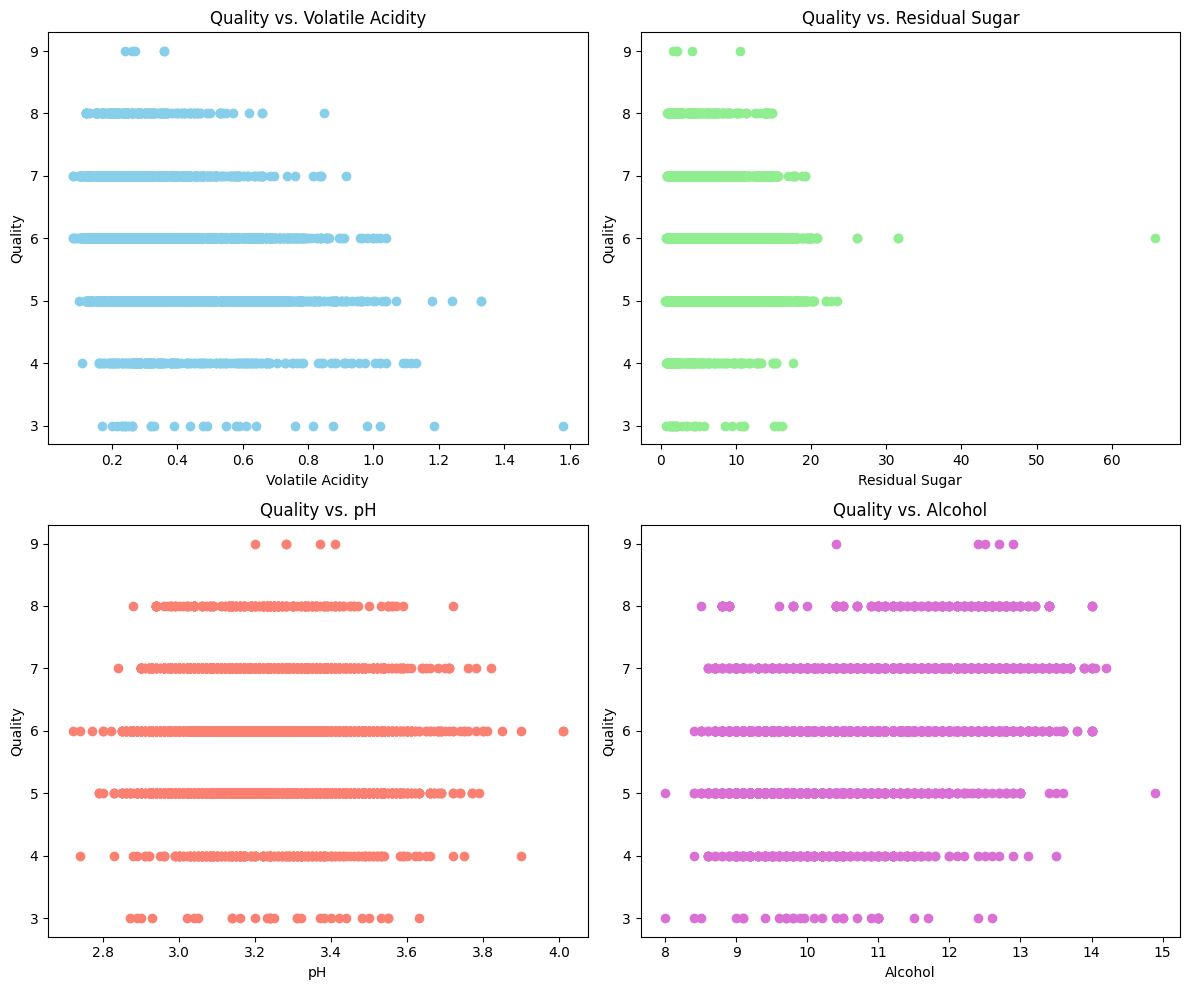

In [27]:
import matplotlib.pyplot as plt

# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatterplot for Volatile Acidity vs Quality
axes[0, 0].scatter(wine_df['volatile acidity'], wine_df['quality'], color='skyblue')
axes[0, 0].set_title('Quality vs. Volatile Acidity')
axes[0, 0].set_xlabel('Volatile Acidity')
axes[0, 0].set_ylabel('Quality')

# Scatterplot for Residual Sugar vs Quality
axes[0, 1].scatter(wine_df['residual sugar'], wine_df['quality'], color='lightgreen')
axes[0, 1].set_title('Quality vs. Residual Sugar')
axes[0, 1].set_xlabel('Residual Sugar')
axes[0, 1].set_ylabel('Quality')

# Scatterplot for pH vs Quality
axes[1, 0].scatter(wine_df['pH'], wine_df['quality'], color='salmon')
axes[1, 0].set_title('Quality vs. pH')
axes[1, 0].set_xlabel('pH')
axes[1, 0].set_ylabel('Quality')

# Scatterplot for Alcohol vs Quality
axes[1, 1].scatter(wine_df['alcohol'], wine_df['quality'], color='orchid')
axes[1, 1].set_title('Quality vs. Alcohol')
axes[1, 1].set_xlabel('Alcohol')
axes[1, 1].set_ylabel('Quality')

# Adjust layout and display
plt.tight_layout()
plt.show()


## Answer

From the scatterplots comparing wine quality to various features, alcohol content appears to have the strongest positive impact on quality.

The question focuses not on which variable has the "most impact" overall but rather on which is "most likely to have a positive impact." This distinction emphasizes a positive correlation—where higher values in one variable are associated with higher quality. Among the scatterplots, alcohol shows the strongest positive correlation with quality, suggesting that wines with higher alcohol content are rated higher.

Below, we include a heatmap to visualize the correlation coefficients of various features to further highlight these relationships with wine quality.

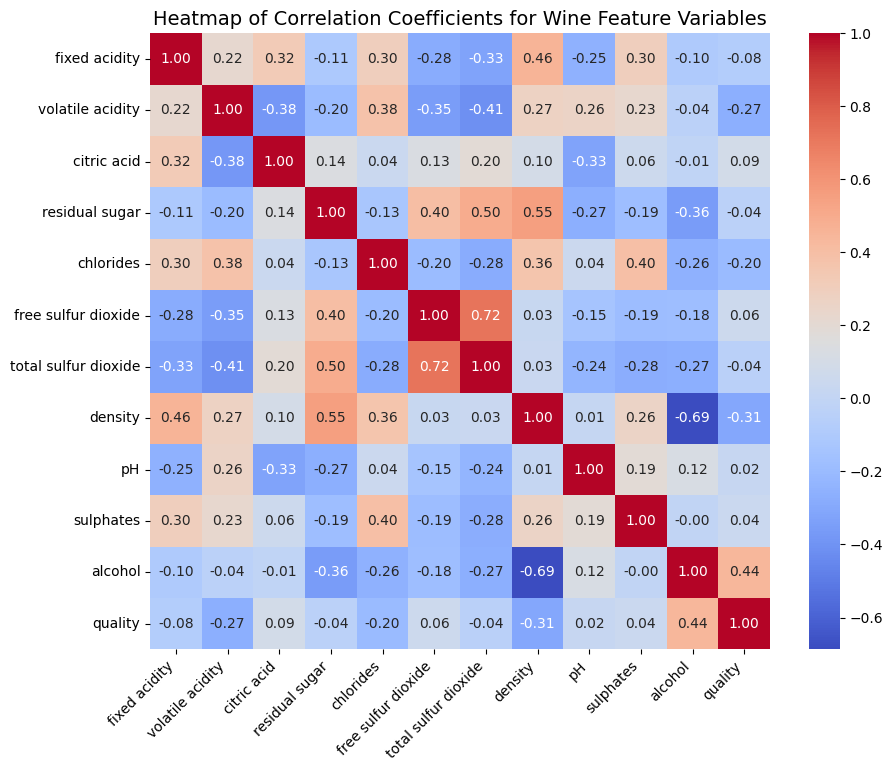

In [29]:
# Exclude the 'color' column to avoid the conversion error
corr = wine_df.drop(columns=['color']).corr()

# Set up the figure size and plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Heatmap of Correlation Coefficients for Wine Feature Variables", fontsize=14)
plt.show()


Referring to the bottom row of Quality, the feature variable with the most positive impact on Quality is Alcohol at 0.44 coefficient. The other features such as Volatile Acidity, Residual Sugar and pH have negative or less than 0.1 correlation.


### 7.0 Drawing Conclusions Using Groupby

#### 7.1.1 Is a Certain Type of Wine Associated with Higher Quality?
To determine if red or white wine is associated with a higher quality, we calculate the average quality score for each type of wine using `groupby` on the `color` column and finding the mean of the `quality` ratings.

In [30]:
# Find the mean quality of each wine type (red and white) with groupby
wine_df.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

**Conclusion**  
White wine typically has a slightly higher average quality rating, at 5.878.

#### 7.1.2 What Level of Acidity Receives the Highest Average Rating?
Unlike `color`, acidity (measured by pH) is a continuous variable and doesn’t naturally fit into categories. To analyze it, we’ll create custom acidity levels based on pH percentiles:

- **High**: Lowest 25% of pH values
- **Moderately High**: 25% - 50% of pH values
- **Medium**: 50% - 75% of pH values
- **Low**: 75% - max pH value

Using these categories, we can then group by acidity level and calculate the mean quality rating for each level.

In [31]:
# Define bin edges and labels based on pH percentiles
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01]  # Min, 25%, 50%, 75%, max
bin_names = ['high', 'moderately high', 'medium', 'low']

# Create a new column 'acidity_levels' with these categories
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bins=bin_edges, labels=bin_names)

# View the data to confirm the 'acidity_levels' column was added successfully
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,moderately high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,moderately high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [34]:
# Find the mean quality of each acidity level with groupby
wine_df.groupby('acidity_levels')['quality'].mean()

/var/folders/8m/_fv4209s7qz680w_6grdnb1r0000gp/T/ipykernel_90317/2099019294.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wine_df.groupby('acidity_levels')['quality'].mean()


acidity_levels
high               5.783343
moderately high    5.784540
medium             5.850832
low                5.859593
Name: quality, dtype: float64

**Answer**  
Wines with lower acidity (higher pH) tend to receive higher average ratings, with the "low acidity" category receiving the highest average quality rating, followed closely by the "medium acidity" level. This suggests a general trend that lower acidity is associated with higher wine quality.

---

### 7.2 Drawing Conclusions Using Query

#### 7.2.1 Do Wines with Higher Alcohol Content Receive Better Ratings?
To explore this, we’ll separate the wines into two groups based on their alcohol content:

- **Low Alcohol**: Wines with alcohol content below the median.
- **High Alcohol**: Wines with alcohol content equal to or above the median.

Next, we calculate the mean quality rating for each group to see if alcohol content impacts wine quality.

In [36]:
# Calculate the median alcohol content
median_alcohol = wine_df['alcohol'].median()  # Result: 10.3

# Create a subset for samples with alcohol content below the median
low_alcohol = wine_df.query('alcohol < @median_alcohol')

# Create a subset for samples with alcohol content equal to or above the median
high_alcohol = wine_df.query('alcohol >= @median_alcohol')

# Define the total number of samples in the dataset
num_samples = wine_df.shape[0]

# Verify that each sample was included exactly once in either subset
is_all_samples_included = num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count()
print(is_all_samples_included)  # Expected output: True

# Calculate the mean quality rating for the low alcohol group
low_alcohol_quality_mean = low_alcohol['quality'].mean()
print("Mean quality for low alcohol group:", low_alcohol_quality_mean)  # Result: 5.48

# Calculate the mean quality rating for the high alcohol group
high_alcohol_quality_mean = high_alcohol['quality'].mean()
print("Mean quality for high alcohol group:", high_alcohol_quality_mean)  # Result: 6.15


True
Mean quality for low alcohol group: 5.475920679886686
Mean quality for high alcohol group: 6.146084337349397


### Answer
Wines that have a higher alcohol content generally achieve better ratings.

### 7.2.2 Do sweeter wines receive better ratings?
In a similar manner, apply the median method to investigate whether sweeter wines receive higher ratings.

In [43]:
# Calculate the median amount of residual sugar
median_residual_sugar = wine_df['residual sugar'].median()
print(f"Median Residual Sugar: {median_residual_sugar}")

# Select samples with residual sugar below the median
low_sugar = wine_df.query('`residual sugar` < @median_residual_sugar')

# Select samples with residual sugar equal to or above the median
high_sugar = wine_df.query('`residual sugar` >= @median_residual_sugar')

# Verify that all samples are accounted for exactly once
num_samples = wine_df.shape[0]
assert num_samples == low_sugar['quality'].count() + high_sugar['quality'].count()  # This should return True

# Calculate the mean quality rating for the low sugar group
mean_low_sugar_quality = low_sugar['quality'].mean()
print(f"Mean Quality Rating for Low Sugar Group: {mean_low_sugar_quality}")

# Calculate the mean quality rating for the high sugar group
mean_high_sugar_quality = high_sugar['quality'].mean()
print(f"Mean Quality Rating for High Sugar Group: {mean_high_sugar_quality}")



Median Residual Sugar: 3.0
Mean Quality Rating for Low Sugar Group: 5.808800743724822
Mean Quality Rating for High Sugar Group: 5.82782874617737


### Answer
Sweeter wines with higher sugar content receives higher rating although there is a close match with lower sugar content.

## 8.0 Visualizing with Matplotlib
Leverage Matplotlib to generate bar charts that illustrate the insights derived from the groupby and query analyses.

### 8.1 Impact of Alcohol Content on Wine Ratings
Generate a bar chart that displays the average ratings for low and high alcohol wine samples, with one bar representing each category.

Text(0, 0.5, 'Average Quality Rating')

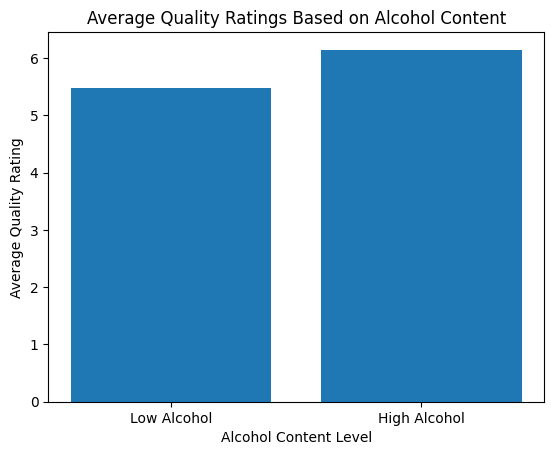

In [44]:
# Utilize query to select each group and calculate the mean quality
# Calculate the overall median for alcohol content
median = wine_df['alcohol'].median()

# Create subsets for data with alcohol content less than and greater than or equal to the median
low_alcohol_group = wine_df.query('alcohol < {}'.format(median))
high_alcohol_group = wine_df.query('alcohol >= {}'.format(median))

# Calculate the mean quality ratings for the low and high alcohol groups
mean_quality_low_alcohol = low_alcohol_group['quality'].mean()
mean_quality_high_alcohol = high_alcohol_group['quality'].mean()

# Generate a bar chart with appropriate labels
positions = [1, 2]
values = [mean_quality_low_alcohol, mean_quality_high_alcohol]
categories = ['Low Alcohol', 'High Alcohol']

plt.bar(positions, values, tick_label=categories)
plt.title('Average Quality Ratings Based on Alcohol Content')
plt.xlabel('Alcohol Content Level')
plt.ylabel('Average Quality Rating')


### Answer
From the bar chart above, wines with higher alcohol content receives a higher quality rating.

### 8.2 Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

Text(0, 0.5, 'Average Quality Rating')

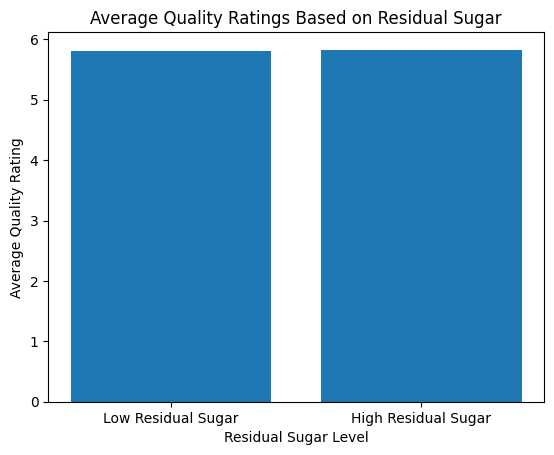

In [47]:
# Use query to identify each group and calculate the mean quality
# Determine the median value for residual sugar
median_residual_sugar = wine_df['residual sugar'].median()

# Create subsets for data with residual sugar less than and greater than or equal to the median
low_sugar_group = wine_df.query('`residual sugar` < {}'.format(median_residual_sugar))
high_sugar_group = wine_df.query('`residual sugar` >= {}'.format(median_residual_sugar))

# Calculate the mean quality ratings for the low and high sugar groups
mean_quality_low_sugar = low_sugar_group['quality'].mean()
mean_quality_high_sugar = high_sugar_group['quality'].mean()

# Generate a bar chart with appropriate labels
positions = [1, 2]
values = [mean_quality_low_sugar, mean_quality_high_sugar]
categories = ['Low Residual Sugar', 'High Residual Sugar']

plt.bar(positions, values, tick_label=categories)
plt.title('Average Quality Ratings Based on Residual Sugar')
plt.xlabel('Residual Sugar Level')
plt.ylabel('Average Quality Rating')


### Answer 
Based on the bar chart above, it is challenging to clearly assess the effect of residual sugar on the quality rating. To gain a clearer understanding, we will create a line chart below to see if we can draw more definitive conclusions.

## 8.3 What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [49]:
# Use groupby to get the mean quality for each acidity level
acidity_level_mean = wine_df.groupby('acidity_levels')['quality'].mean()
acidity_level_mean

/var/folders/8m/_fv4209s7qz680w_6grdnb1r0000gp/T/ipykernel_90317/1908380066.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acidity_level_mean = wine_df.groupby('acidity_levels')['quality'].mean()


acidity_levels
high               5.783343
moderately high    5.784540
medium             5.850832
low                5.859593
Name: quality, dtype: float64

Text(0, 0.5, 'Average Quality Rating')

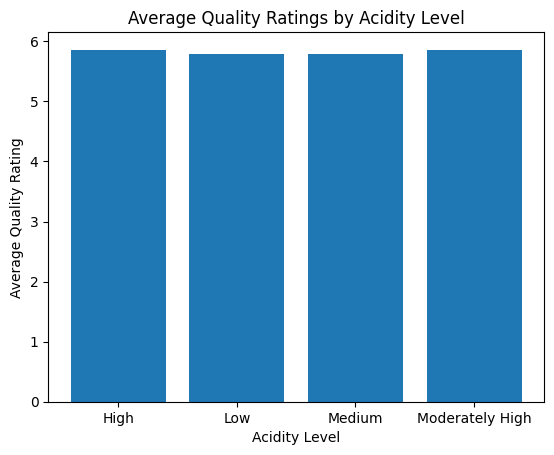

In [50]:
# Create a bar chart with appropriate labels
locations = [2, 3, 4, 1]  # Adjusted locations for the bars
heights = acidity_level_mean  # Heights based on mean quality ratings
labels = ['Low', 'Medium', 'Moderately High', 'High']  # Labels for each acidity level

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating')


### Answer
Likewise, the bar chart above does not yield any significant insights regarding which acidity level is associated with lower or higher quality ratings.

# Conclusion

In this analysis, we explored several key questions about the relationship between various wine characteristics and their quality ratings. Here’s a summary of our findings:

1. **Association of Wine Type with Quality**
   - **Observation:** White wine is generally associated with higher quality ratings compared to red wine. 
   - **Key Point:** This suggests that consumers may prefer white wine for its perceived quality.

2. **Impact of Alcohol Content on Ratings**
   - **Observation:** Wines with higher alcohol content tend to receive better quality ratings.
   - **Key Point:** This indicates that alcohol level may positively influence the perception of quality among tasters.

3. **Relationship Between Sweetness and Quality**
   - **Observation:** Sweeter wines, characterized by higher residual sugar, typically receive better ratings, although there is a close competition with wines that have lower sugar content.
   - **Key Point:** This suggests that while sweetness can enhance a wine's appeal, it may not be the sole determinant of quality.

4. **Influence of Acidity Levels on Quality**
   - **Observation:** Wines with low acidity levels (pH) receive the highest average quality ratings, followed closely by those with medium acidity levels.
   - **Key Point:** This reinforces the idea that lower acidity can contribute positively to the overall quality perception of a wine.

Thank you for taking the time to read through this analysis! Your insights and reflections on these findings are valuable for understanding wine preferences and quality perceptions.